# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | andergrove
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | vilyuysk
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | quellon
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | sola
Processing Record 12 of Set 1 | smara
Processing Record 13 of Set 1 | geraldton
Processing Record 14 of Set 1 | kerikeri
Processing Record 15 of Set 1 | rongelap
Processing Record 16 of Set 1 | faya-largeau
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | ancud
Processing Record 20 of Set 1 | karystos
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | edinburgh of the seven seas
Process

Processing Record 41 of Set 4 | bocas del toro
Processing Record 42 of Set 4 | el quebrachal
Processing Record 43 of Set 4 | beau vallon
Processing Record 44 of Set 4 | velykyy bereznyy
City not found. Skipping...
Processing Record 45 of Set 4 | campobello di licata
Processing Record 46 of Set 4 | hualien city
Processing Record 47 of Set 4 | papao
Processing Record 48 of Set 4 | hawaiian paradise park
Processing Record 49 of Set 4 | burang
Processing Record 0 of Set 5 | inhambane
Processing Record 1 of Set 5 | kuala sungai baru
Processing Record 2 of Set 5 | soio
Processing Record 3 of Set 5 | darwin
Processing Record 4 of Set 5 | concepcion del oro
Processing Record 5 of Set 5 | nova sintra
Processing Record 6 of Set 5 | tafuna
Processing Record 7 of Set 5 | tolanaro
Processing Record 8 of Set 5 | bargaal
Processing Record 9 of Set 5 | fort bragg
Processing Record 10 of Set 5 | komsomol'skiy
Processing Record 11 of Set 5 | micheweni
Processing Record 12 of Set 5 | alpendurada
City not

Processing Record 31 of Set 8 | san pedro pochutla
Processing Record 32 of Set 8 | labrador city
Processing Record 33 of Set 8 | colonia
Processing Record 34 of Set 8 | vadso
Processing Record 35 of Set 8 | hassi messaoud
Processing Record 36 of Set 8 | pauini
Processing Record 37 of Set 8 | ipameri
Processing Record 38 of Set 8 | waddan
Processing Record 39 of Set 8 | tazacorte
Processing Record 40 of Set 8 | bayevo
Processing Record 41 of Set 8 | ca mau
Processing Record 42 of Set 8 | nova olimpia
Processing Record 43 of Set 8 | pursat
Processing Record 44 of Set 8 | avarua
Processing Record 45 of Set 8 | corinto
Processing Record 46 of Set 8 | bikenibeu village
Processing Record 47 of Set 8 | bel ombre
Processing Record 48 of Set 8 | orkney
Processing Record 49 of Set 8 | smidovich
Processing Record 0 of Set 9 | akrehamn
Processing Record 1 of Set 9 | filey
Processing Record 2 of Set 9 | lake city
Processing Record 3 of Set 9 | santa cruz
Processing Record 4 of Set 9 | pangai
Proces

City not found. Skipping...
Processing Record 20 of Set 12 | addiet canna
Processing Record 21 of Set 12 | wharton
Processing Record 22 of Set 12 | mikhnevo
Processing Record 23 of Set 12 | praia da vitoria
Processing Record 24 of Set 12 | acapulco de juarez
Processing Record 25 of Set 12 | lluta
Processing Record 26 of Set 12 | mar del plata
Processing Record 27 of Set 12 | hoxtolgay
City not found. Skipping...
Processing Record 28 of Set 12 | toga village
City not found. Skipping...
Processing Record 29 of Set 12 | yonan-up
Processing Record 30 of Set 12 | essaouira
Processing Record 31 of Set 12 | goundi
Processing Record 32 of Set 12 | westport
Processing Record 33 of Set 12 | yasnogorsk
Processing Record 34 of Set 12 | ras gharib
City not found. Skipping...
Processing Record 35 of Set 12 | osh
Processing Record 36 of Set 12 | kiruna
Processing Record 37 of Set 12 | great falls
Processing Record 38 of Set 12 | nagato
Processing Record 39 of Set 12 | balaipungut
Processing Record 40

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,293.02,100,75,10.29,PT,1700993491
1,andergrove,-21.0833,149.1833,298.51,85,100,3.08,AU,1700993492
2,waitangi,-43.9535,-176.5597,287.49,97,94,1.34,NZ,1700993492
3,longyearbyen,78.2186,15.6401,268.06,80,75,2.06,SJ,1700993492
4,puerto natales,-51.7236,-72.4875,277.24,83,78,6.40,CL,1700993492


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,293.02,100,75,10.29,PT,1700993491
1,andergrove,-21.0833,149.1833,298.51,85,100,3.08,AU,1700993492
2,waitangi,-43.9535,-176.5597,287.49,97,94,1.34,NZ,1700993492
3,longyearbyen,78.2186,15.6401,268.06,80,75,2.06,SJ,1700993492
4,puerto natales,-51.7236,-72.4875,277.24,83,78,6.40,CL,1700993492


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

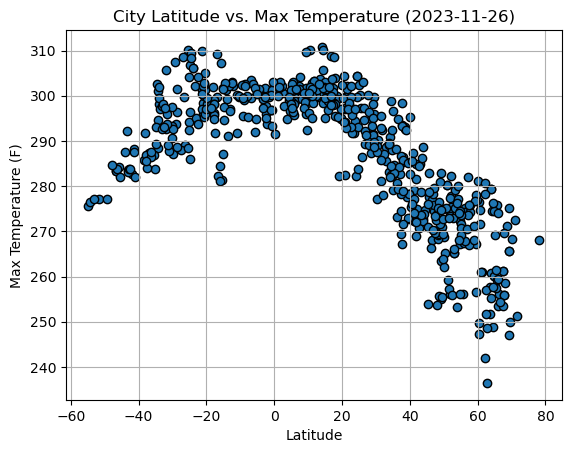

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-11-26)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

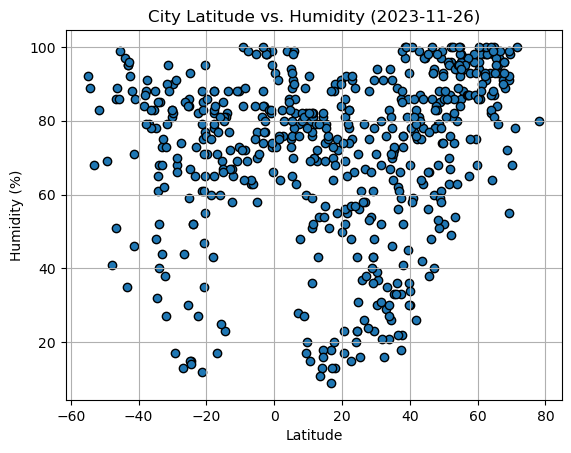

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-11-26)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

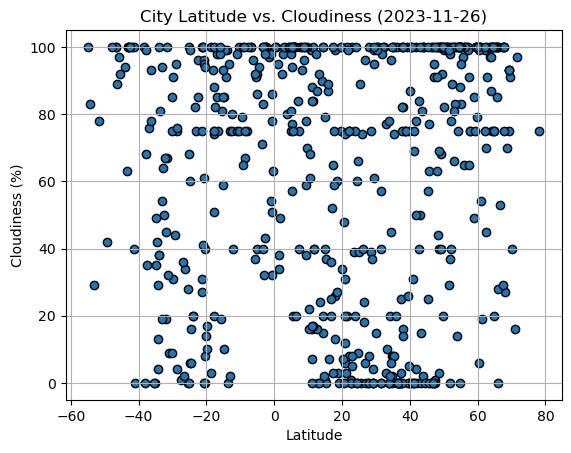

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-11-26)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

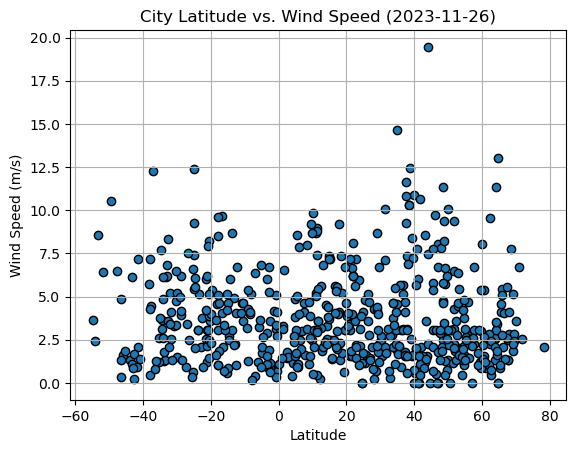

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-11-26)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regression_values = x_value * slope + intercept
    line_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
    print("The r-value is: ", rvalue)
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regression_values,"r")
    plt.annotate(line_equation, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.show()

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,293.02,100,75,10.29,PT,1700993491
3,longyearbyen,78.2186,15.6401,268.06,80,75,2.06,SJ,1700993492
5,vilyuysk,63.7553,121.6247,251.82,99,100,2.55,RU,1700993493
9,albany,42.6001,-73.9662,270.78,81,84,1.43,US,1700993494
11,smara,26.7384,-11.6719,289.26,67,96,2.77,EH,1700993494


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,andergrove,-21.0833,149.1833,298.51,85,100,3.08,AU,1700993492
2,waitangi,-43.9535,-176.5597,287.49,97,94,1.34,NZ,1700993492
4,puerto natales,-51.7236,-72.4875,277.24,83,78,6.40,CL,1700993492
6,adamstown,-25.0660,-130.1015,294.24,86,100,12.40,PN,1700993493
7,ushuaia,-54.8000,-68.3000,275.61,92,100,3.65,AR,1700993493


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:  -0.8743287807701531


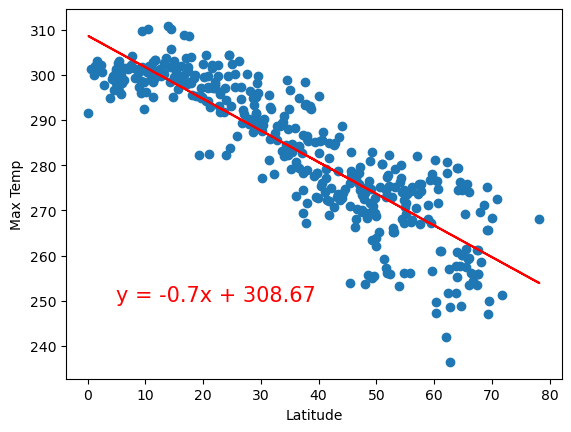

In [44]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp", (5, 250))

The r-value is:  0.5943192533491974


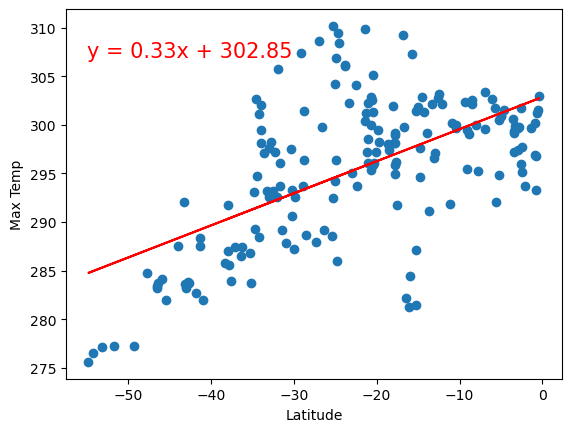

In [45]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp", (-55, 307))

**Discussion about the linear relationship:** There is a correlation between the fields Max Temperature and Latitude as seen in both regression lines and r-values for Northern Hemisphere and Southern Hemisphere. The r-value for The Northern Hemisphere Max Temp vs. Latitude is -0.8743287807701531 which had an absolute value greater than 0.7. Since the r-value for the Northern Hemisphere Max Temp vs. Latitude is negative there is a strong negative correlation between the fields Max Temp and Latitude; as the Latitude increase, the the Max Temp decrease in the Northern Hemisphere. The r-value for The Southern Hemisphere Max Temp vs. Latitude is 0.5943192533491974 which had an absolute value greater than 0.5 and less than 0.7. Since the r-value for the Southern Hemisphere Max Temp vs. Latitude is positive there is a moderate positive correlation between the fields Max Temp and Latitude; as the Latitude increase, the the Max Temp increase in the Southern Hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is:  0.35339541648143835


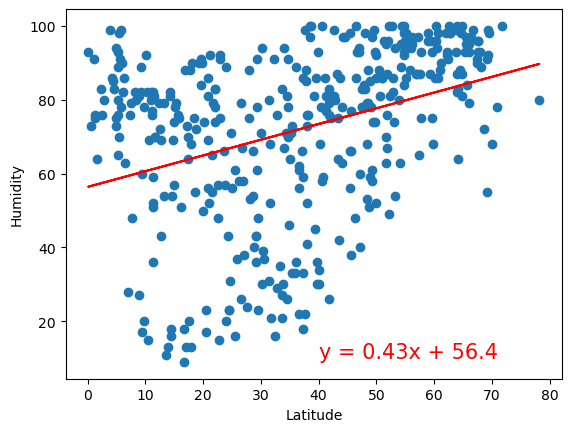

In [46]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (40, 10))

The r-value is:  0.07689565385686464


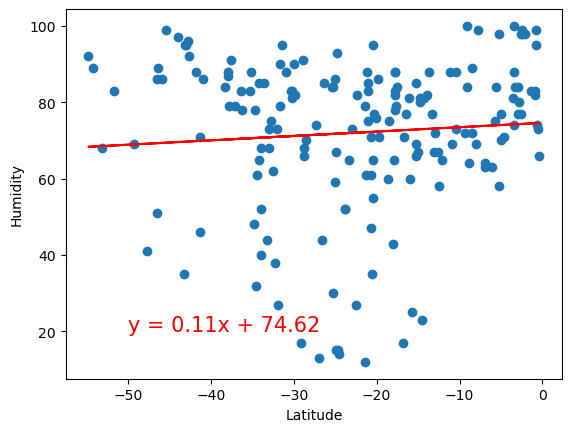

In [47]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (-50, 20))

**Discussion about the linear relationship:** There is a weak correlation between the fields Humidity and Latitude in the Northern Hemisphere as seen in the regression line and the r-value for Northern Hemisphere graph. The r-value for The Northern Hemisphere Humidity vs. Latitude is 0.35339541648143835 which had an absolute value greater than 0.3 and less than 0.5. Since the r-value for the Northern Hemisphere Humidity vs. Latitude is positive there is a weak positive correlation between the fields Humidity and Latitude in the Northern Hemisphere; as the Latitude increase, the the Humidity increase in the Northern Hemisphere. The r-value for The Southern Hemisphere Humidity vs. Latitude is 0.07689565385686464 which had an absolute value less than 0.3. Since the r-value for the Southern Hemisphere Humidity vs. Latitude is positive and the r-value is less than 0.3, there is a little to no (positive) correlation between the fields Humidity and Latitude in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:  0.18217554448685042


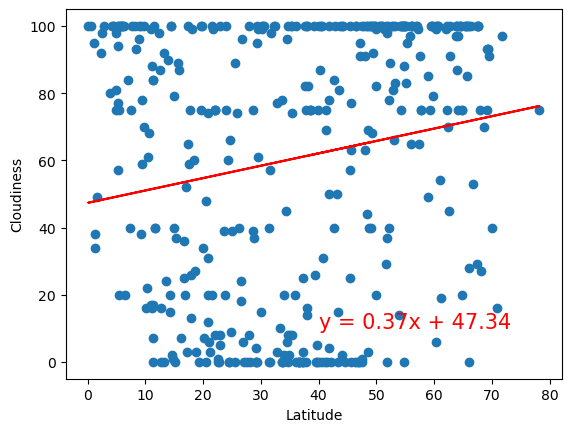

In [48]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (40, 10))

The r-value is:  0.13174878308478036


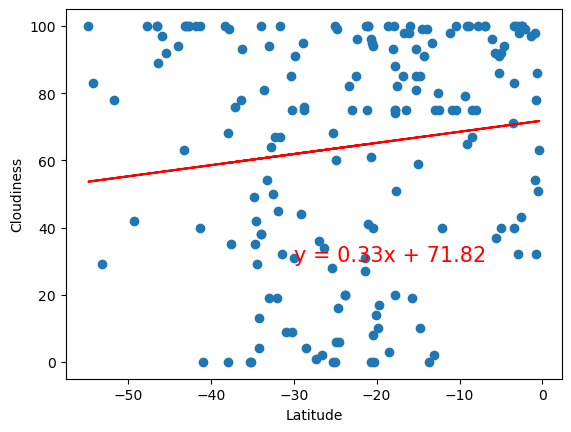

In [49]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", (-30, 30))

**Discussion about the linear relationship:** There little to no correlation between the fields Cloudiness and Latitude in both Northern Hemisphere and Southern Hemisphere as seen in the regression line and the r-value for both Northern Hemisphere and Southern Hemisphere graphs respectively. The r-value for The Northern Hemisphere Cloudiness vs. Latitude is 0.18217554448685042 which had an absolute value less than 0.3. Since the r-value for the Northern Hemisphere Cloudiness vs. Latitude is positive and the r-value is less than 0.3, there is a little to no (positive) correlation between the fields Cloudiness and Latitude in the Northern Hemisphere. The r-value for The Southern Hemisphere Cloudiness vs. Latitude is 0.13174878308478036 which had an absolute value less than 0.3. Since the r-value for the Southern Hemisphere Cloudiness vs. Latitude is positive and the r-value is less than 0.3, there is a little to no (positive) correlation between the fields Cloudiness and Latitude in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:  -0.046927791528699234


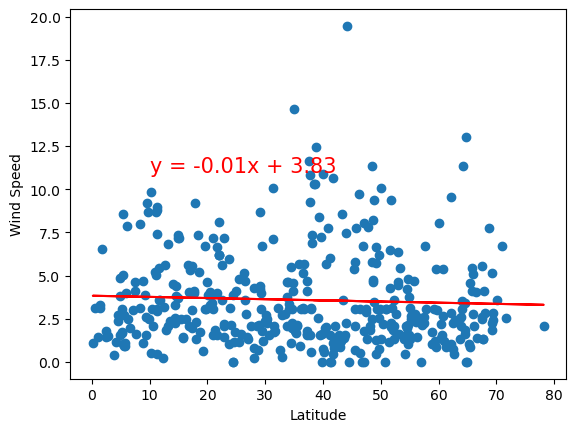

In [50]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (10, 11))

The r-value is:  -0.11774115485456998


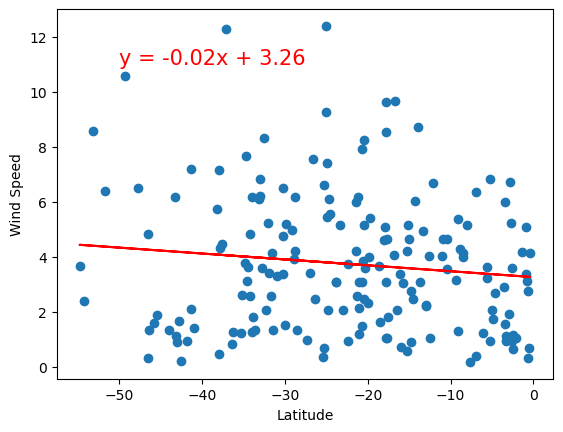

In [51]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", (-50, 11))

**Discussion about the linear relationship:** There little to no correlation between the fields Wind Speed and Latitude in both Northern Hemisphere and Southern Hemisphere as seen in the regression line and the r-value for both Northern Hemisphere and Southern Hemisphere graphs respectively. The r-value for The Northern Hemisphere Wind Speed vs. Latitude is -0.046927791528699234 which had an absolute value less than 0.3. Since the r-value for the Northern Hemisphere Wind Speed vs. Latitude is negative and the r-value is less than 0.3, there is a little to no (negative) correlation between the fields Wind Speed and Latitude in the Northern Hemisphere. The r-value for The Southern Hemisphere Wind Speed vs. Latitude is -0.11774115485456998 which had an absolute value less than 0.3. Since the r-value for the Southern Hemisphere Wind Speed vs. Latitude is negative and the r-value is less than 0.3, there is a little to no (negative) correlation between the fields Wind Speed and Latitude in the Southern Hemisphere.